#**Overview:**
This notebook is used to perform Exploratory Data Analysis (EDA) on the chosen MIMIC-CXR dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive


###Loading text files and preprocessing:




In [39]:
drive.mount('/content/drive')
path = "/content/drive/My Drive/Dissertation"
test_labels = pd.read_csv(path+"/mimic-cxr-2.1.0-test-set-labeled.csv")
providers = pd.read_csv(path+"/cxr-provider-list.csv")
records = pd.read_csv(path+"/cxr-record-list.csv")
studies = pd.read_csv(path+"/cxr-study-list.csv")
chex_labels = pd.read_csv(path+"/mimic-cxr-2.0.0-chexpert.csv")
negbio_labels = pd.read_csv(path+"/mimic-cxr-2.0.0-negbio.csv")
split = pd.read_csv(path+"/mimic-cxr-2.0.0-split.csv")

In [40]:
negbio_labels

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,56699142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227822,19999442,58708861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
227823,19999733,57132437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
227824,19999987,55368167,1.0,-1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
227825,19999987,58621812,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


,0
Atelectasis,57666
Cardiomegaly,66760
Consolidation,23076
Edema,65833
Enlarged Cardiomediastinum,21807
Fracture,5831
Lung Lesion,8287
Lung Opacity,58425
No Finding,78777
Pleural Effusion,87272


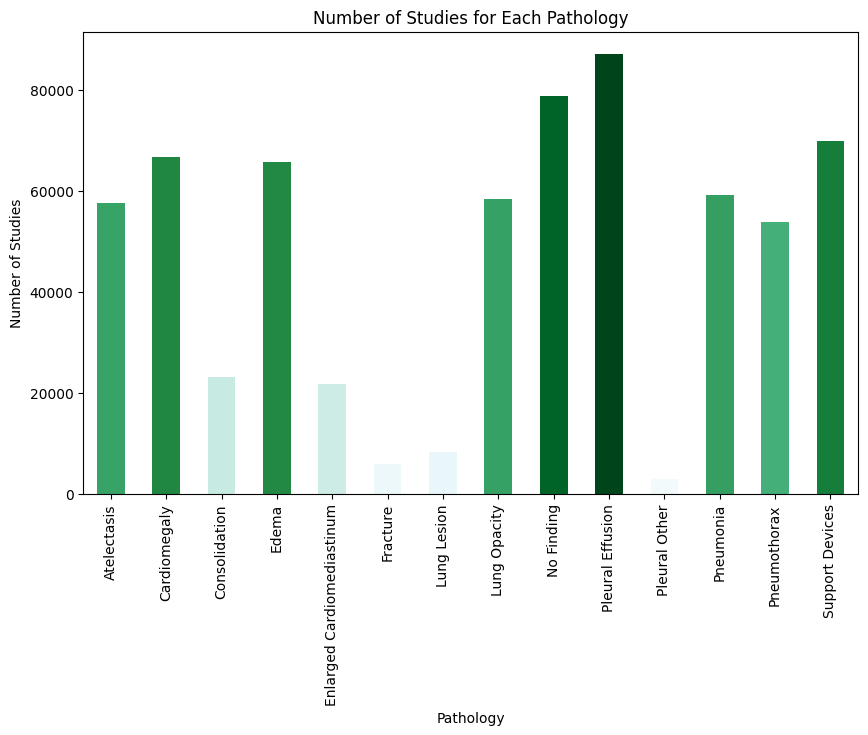

In [41]:
#find the number of non NaN values for each pathology
display(negbio_labels.count()[2:])
#create a bar chart for the number of studies for each pathology

plt.figure(figsize=(10, 6))
# Get the bar lengths
bar_lengths = negbio_labels.count()[2:].values

# Create a colormap
cmap = plt.get_cmap('BuGn')
colors = cmap(bar_lengths / max(bar_lengths))

negbio_labels.count()[2:].plot(kind='bar', color=colors)
plt.title('Number of Studies for Each Pathology')
plt.xlabel('Pathology')
plt.ylabel('Number of Studies')
plt.show()

In [42]:
#selecting only the studies that are relevant to Pneumonia
negbio_labels = negbio_labels.drop(['Atelectasis', 'Cardiomegaly',
       'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture',
       'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion',
       'Pleural Other', 'Pneumothorax', 'Support Devices'], axis=1)
display(negbio_labels)

,subject_id,study_id,Pneumonia
0,10000032,50414267,NaN
1,10000032,53189527,NaN
2,10000032,53911762,NaN
3,10000032,56699142,NaN
4,10000764,57375967,-1.0
...,...,...,...
227822,19999442,58708861,NaN
227823,19999733,57132437,NaN
227824,19999987,55368167,NaN
227825,19999987,58621812,NaN


In [53]:
value_counts['NaN']

168642

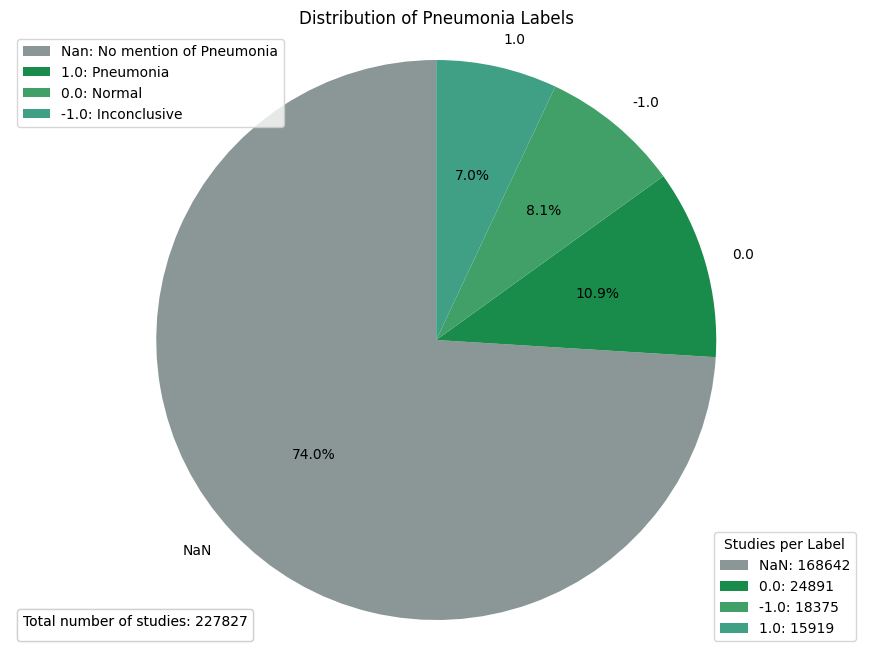

In [75]:
value_counts = negbio_labels['Pneumonia'].fillna('NaN').value_counts()


colors = ['#8b9696','#198b4b', '#40a068', '#40a086', '#40a093','#8b9696']

# Create pie chart
plt.figure(figsize=(11, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Pneumonia Labels')
plt.axis('equal')


# label explanation
legend1 = plt.legend(['Nan: No mention of Pneumonia','1.0: Pneumonia', '0.0: Normal', '-1.0: Inconclusive'], loc='upper left')

# label coutns
legend_labels = [f"{label}: {count}" for label, count in zip(value_counts.index, value_counts.values)]
legend2 = plt.legend(legend_labels, loc='lower right', title='Studies per Label')

#total studies
legend3 = plt.legend([], loc='lower left', title=f"Total number of studies: {len(negbio_labels)}")

plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.gca().add_artist(legend3)
plt.show()

In [78]:
negbio_labels = negbio_labels.dropna()

In [79]:
negbio_labels

,subject_id,study_id,Pneumonia
4,10000764,57375967,-1.0
7,10000935,50578979,1.0
8,10000935,51178377,-1.0
13,10000980,50985099,-1.0
14,10000980,51967283,1.0
...,...,...,...
227796,19998770,51149538,0.0
227801,19998843,56350227,1.0
227805,19999068,54061983,-1.0
227808,19999068,59390811,-1.0


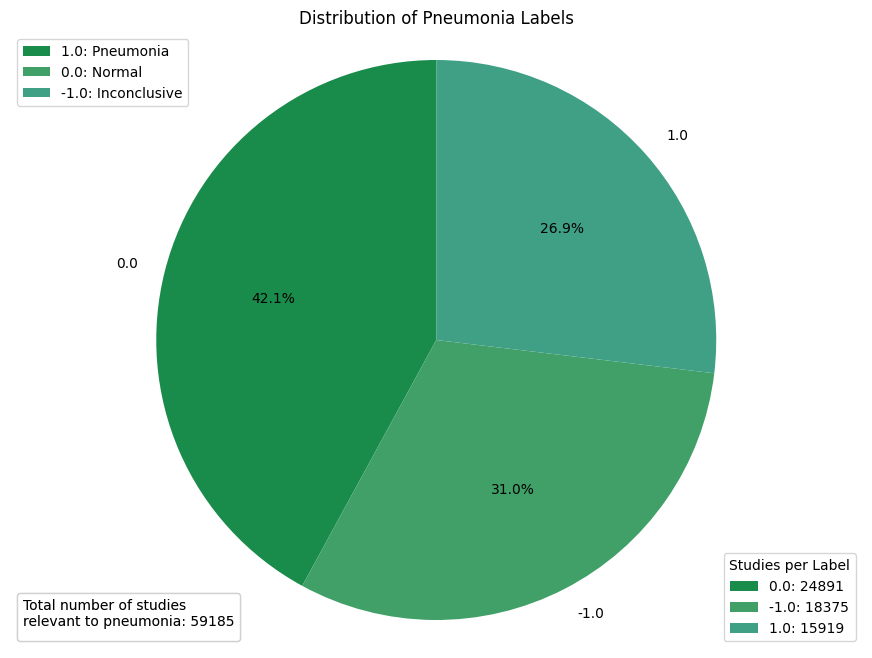

In [81]:
value_counts = negbio_labels['Pneumonia'].fillna('NaN').value_counts()


colors = ['#198b4b', '#40a068', '#40a086', '#40a093','#8b9696']

# Create pie chart
plt.figure(figsize=(11, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Pneumonia Labels')
plt.axis('equal')


# label explanation
legend1 = plt.legend(['1.0: Pneumonia', '0.0: Normal', '-1.0: Inconclusive'], loc='upper left')

# label coutns
legend_labels = [f"{label}: {count}" for label, count in zip(value_counts.index, value_counts.values)]
legend2 = plt.legend(legend_labels, loc='lower right', title='Studies per Label')

#total studies
legend3 = plt.legend([], loc='lower left', title=f"Total number of studies \nrelevant to pneumonia: {len(negbio_labels)}")

plt.gca().add_artist(legend1)
plt.gca().add_artist(legend2)
plt.gca().add_artist(legend3)
plt.show()

Exploring the number of studies per patient ID

In [95]:
negbio_labels['subject_id'].value_counts()

,count
subject_id,
16662316,42
12351481,42
15936063,41
16454913,40
18295542,37
...,...
14297395,1
14296899,1
14296791,1


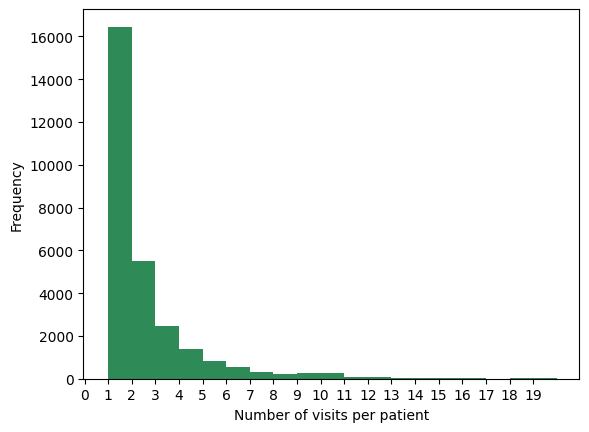

In [98]:
# check the number of studies per subject id
bar_lengths = negbio_labels['subject_id'].value_counts()

# Create a colormap
cmap = plt.get_cmap('BuGn')
colors = cmap(bar_lengths / max(bar_lengths))
# plot a histogram
plt.hist(negbio_labels['subject_id'].value_counts(), bins=[0.9,1,2,3,4,5,6,7,8,9,11,12,13,14,15,16,17,18,19,20], color='seagreen')
plt.xlabel('Number of visits per patient')
plt.xticks(range(20))
plt.ylabel('Frequency')
plt.show()

In [108]:
visit_counts = negbio_labels.groupby('subject_id')['study_id'].nunique()
v = visit_counts.value_counts().sort_index()
visits = {'1':v[1],'2':v[2],'3':v[3],'4':v[4],'5 or more':sum(v[5:])}
# Extract data for plotting
visit_keys = list(visits.keys())
visit_values = list(visits.values())

chart = pd.DataFrame(visits.items(), columns = ['Visits', 'Count'])
chart

,Visits,Count
0,1,16451
1,2,5520
2,3,2465
3,4,1378
4,5 or more,1681


In [ ]:
#exploring the reccomended train test val split
train=0
test=0
val=0
other=0
for i in range(len(split)):
  if split['split'][i]=='train':
    train+=1
  elif split['split'][i]=='test':
    test+=1
  elif split['split'][i]=='validate':
    val+=1
print(train,test,val,train+test+val)

368960 5159 2991 377110


In [111]:
v[5]

827

Adding the text files and image file paths to the dataframe:

In [ ]:
df = pd.merge(negbio_labels, studies, on=['study_id', 'subject_id'],suffixes=('_negbio','_1'))
df.rename(columns={'path': 'report_path'}, inplace=True)
print(df)

       subject_id  study_id  Pneumonia                        report_path
0        10000764  57375967       -1.0  files/p10/p10000764/s57375967.txt
1        10000935  50578979        1.0  files/p10/p10000935/s50578979.txt
2        10000935  51178377       -1.0  files/p10/p10000935/s51178377.txt
3        10000980  50985099       -1.0  files/p10/p10000980/s50985099.txt
4        10000980  51967283        1.0  files/p10/p10000980/s51967283.txt
...           ...       ...        ...                                ...
59180    19998770  51149538        0.0  files/p19/p19998770/s51149538.txt
59181    19998843  56350227        1.0  files/p19/p19998843/s56350227.txt
59182    19999068  54061983       -1.0  files/p19/p19999068/s54061983.txt
59183    19999068  59390811       -1.0  files/p19/p19999068/s59390811.txt
59184    19999270  55274188        0.0  files/p19/p19999270/s55274188.txt

[59185 rows x 4 columns]


In [ ]:
#selecting a subset of the whole database
# df = df[df.iloc[:, -1].str.contains('p19|p18')]
df

,subject_id,study_id,Pneumonia,report_path
0,10000764,57375967,-1.0,files/p10/p10000764/s57375967.txt
1,10000935,50578979,1.0,files/p10/p10000935/s50578979.txt
2,10000935,51178377,-1.0,files/p10/p10000935/s51178377.txt
3,10000980,50985099,-1.0,files/p10/p10000980/s50985099.txt
4,10000980,51967283,1.0,files/p10/p10000980/s51967283.txt
...,...,...,...,...
59180,19998770,51149538,0.0,files/p19/p19998770/s51149538.txt
59181,19998843,56350227,1.0,files/p19/p19998843/s56350227.txt
59182,19999068,54061983,-1.0,files/p19/p19999068/s54061983.txt
59183,19999068,59390811,-1.0,files/p19/p19999068/s59390811.txt


In [ ]:
import pandas as pd

texts = []
labels = df['Pneumonia'].tolist()
study_ids = df['study_id'].tolist()
base_path = "/content/drive/My Drive/Dissertation/reports/"

# Load the text files
for path in df['report_path']:
  full_path = base_path + path
  with open(full_path, 'r') as file:
      text = file.read()
      texts.append(text)

# Create a DataFrame with the texts and labels
data = {'study_id':study_ids,'text': texts, 'label': labels}
pneumonia_df = pd.DataFrame(data)

In [ ]:
# # Convert to Hugging Face Dataset
# dataset = Dataset.from_pandas(data_df)
df = df.reset_index(drop=True)
pneumonia_df['study_id']=df['study_id']

In [ ]:
pneumonia_df

,study_id,text,label
0,57375967,FINAL REPORT\...,-1.0
1,50578979,FINAL REPORT\...,1.0
2,51178377,FINAL REPORT\...,-1.0
3,50985099,FINAL REPORT\...,-1.0
4,51967283,FINAL REPORT\...,1.0
...,...,...,...
59180,51149538,FINAL REPORT\...,0.0
59181,56350227,FINAL REPORT\...,1.0
59182,54061983,FINAL REPORT\...,-1.0
59183,59390811,FINAL REPORT\...,-1.0


In [ ]:
max1=0
id1=0
for i in range(len(pneumonia_df['text'])):
  l =len(pneumonia_df['text'][i])
  if l>max1:
               max1=l
               id1=i

print(l,id1)

In [ ]:
print(pneumonia_df['text'][id1])
print('label',pneumonia_df['label'][id1])

In [ ]:
lbl = pneumonia_df['label']
pneumonia_df = pneumonia_df.drop('label',axis=1)
pneumonia_df['pneumonia'] = lbl

In [ ]:
pneumonia_df

,study_id,text,pneumonia
0,57375967,FINAL REPORT\...,-1.0
1,50578979,FINAL REPORT\...,1.0
2,51178377,FINAL REPORT\...,-1.0
3,50985099,FINAL REPORT\...,-1.0
4,51967283,FINAL REPORT\...,1.0
...,...,...,...
59180,51149538,FINAL REPORT\...,0.0
59181,56350227,FINAL REPORT\...,1.0
59182,54061983,FINAL REPORT\...,-1.0
59183,59390811,FINAL REPORT\...,-1.0


Adding the reccomended train validate test split do the dataframe

In [ ]:

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Dissertation/pneumonia_full.csv') # alt: pneumonia2 with two parts, or pneumonia_full with all of the data
# df_test = pd.read_csv('/content/drive/My Drive/Dissertation/mimic-cxr-2.1.0-test-set-labeled.csv')

Mounted at /content/drive


In [ ]:
assert (df['study_id'] == pd.merge(df, split_unique, on=['study_id'], how='left')['study_id']).all()

In [ ]:
split_unique = split[['study_id', 'split']].drop_duplicates(subset=['study_id'])
pneumonia_df = pd.merge(df, split_unique, on=['study_id'], how='left')
display(pneumonia_df.head())

,study_id,text,pneumonia,split
0,57375967,FINAL REPORT\...,-1.0,train
1,50578979,FINAL REPORT\...,1.0,train
2,51178377,FINAL REPORT\...,-1.0,train
3,50985099,FINAL REPORT\...,-1.0,train
4,51967283,FINAL REPORT\...,1.0,train


In [ ]:
# save the dataframe to csv file
pneumonia_df.to_csv('/content/drive/My Drive/Dissertation/pneumonia_full.csv', index=False)

##Creating a dataframe that has the human verified label values and checking the data

In [ ]:
testdf = pd.read_csv('/content/drive/My Drive/Dissertation/pneumonia_full.csv')
testdf

,study_id,text,pneumonia
0,57375967,FINAL REPORT\...,-1.0
1,50578979,FINAL REPORT\...,1.0
2,51178377,FINAL REPORT\...,-1.0
3,50985099,FINAL REPORT\...,-1.0
4,51967283,FINAL REPORT\...,1.0
...,...,...,...
59180,51149538,FINAL REPORT\...,0.0
59181,56350227,FINAL REPORT\...,1.0
59182,54061983,FINAL REPORT\...,-1.0
59183,59390811,FINAL REPORT\...,-1.0


In [ ]:
df_test

,study_id,Pneumonia
0,59761780,0.0
1,58848750,1.0
2,56480068,0.0
3,57661627,0.0
4,51924292,-1.0
...,...,...
229,57261102,-1.0
230,56277244,1.0
231,54325260,-1.0
232,50567642,1.0


In [ ]:
#checking the human verified study list with correct labeling
for i in range(len(df_test)-1):
  if df_test['study_id'][i] not in df['study_id'].tolist():
    print(df_test['study_id'][i],df_test['Pneumonia'][i])

54107786 -1.0
57141526 -1.0
50916783 0.0
52682048 -1.0


There seem to be 4 studies where human experts added a pneumonia label, where the negbio had NaN

In [ ]:
df_test = df_test.drop(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Lesion', 'Airspace Opacity', 'Edema', 'Consolidation',
        'Atelectasis', 'Pneumothorax', 'Pleural Effusion',
       'Pleural Other', 'Fracture', 'Support Devices'],axis=1)
df_test = df_test.dropna()
df_test = df_test.sample(frac=1).reset_index(drop=True)

In [ ]:
pneumonia_test = pd.merge(df_test, df, on=['study_id'],suffixes=('_actual','_negbio'))

In [ ]:
pneumonia_test

,study_id,text,pneumonia
0,59761780,FINAL REPORT\...,0.0
1,58848750,FINAL REPORT\...,1.0
2,56480068,FINAL REPORT\...,0.0
3,57661627,WET READ: ___ ___ 9:19 PM\n Post-surgical ch...,0.0
4,51924292,FINAL REPORT\...,-1.0
...,...,...,...
225,57261102,FINAL REPORT\...,-1.0
226,56277244,FINAL REPORT\...,1.0
227,54325260,FINAL REPORT\...,-1.0
228,50567642,FINAL REPORT\...,1.0


In [ ]:
pneumonia_test = pneumonia_test.rename(columns={'Pneumonia':'pneumonia'})

In [ ]:
pneumonia_test.to_csv('/content/drive/My Drive/Dissertation/pneumonia_test.csv', index=False)